<a href="https://colab.research.google.com/github/Thepadilha/ML-with-TensorFlow/blob/master/FirstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop - PACE Applications of Machine Learning: Your First ML Project with TensorFlow
# prof. Chris Blanton

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import numpy as np #random values
#import matplotlib.pyplot as plt #data visualization 
#import tensorflow as tf #TensorFlow

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 1.15.0
Eager execution is: False
Keras version: 2.2.4-tf


In [0]:
from sklearn.datasets import load_breast_cancer # Loading the breast cancer from a standard repository within SciKit
cancer = load_breast_cancer()

In [7]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [8]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [11]:
cancer.feature_names    

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [16]:
print(cancer.target_names)

['malignant' 'benign']


In [0]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [19]:
for key in df_cancer.keys():
  newkey = key.replace(" ", "_")
  df_cancer.rename(index=str,columns={key:newkey},inplace=True)
print(df_cancer.keys())

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')


In [20]:
df_cancer.head

<bound method NDFrame.head of      mean_radius  mean_texture  ...  worst_fractal_dimension  target
0          17.99         10.38  ...                  0.11890     0.0
1          20.57         17.77  ...                  0.08902     0.0
2          19.69         21.25  ...                  0.08758     0.0
3          11.42         20.38  ...                  0.17300     0.0
4          20.29         14.34  ...                  0.07678     0.0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[569 rows x 31 columns]>

In [21]:
df_cancer.tail

<bound method NDFrame.tail of      mean_radius  mean_texture  ...  worst_fractal_dimension  target
0          17.99         10.38  ...                  0.11890     0.0
1          20.57         17.77  ...                  0.08902     0.0
2          19.69         21.25  ...                  0.08758     0.0
3          11.42         20.38  ...                  0.17300     0.0
4          20.29         14.34  ...                  0.07678     0.0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115     0.0
565        20.13         28.25  ...                  0.06637     0.0
566        16.60         28.08  ...                  0.07820     0.0
567        20.60         29.33  ...                  0.12400     0.0
568         7.76         24.54  ...                  0.07039     1.0

[569 rows x 31 columns]>

In [22]:
df_cancer.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


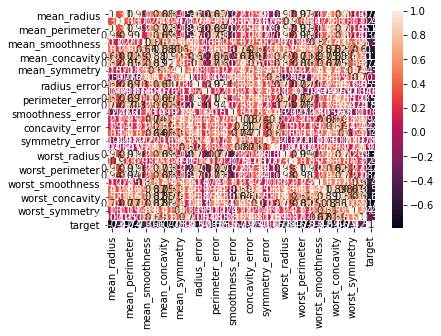

In [23]:
sns.heatmap(df_cancer.corr(),annot=True)

(31.5, -0.5)

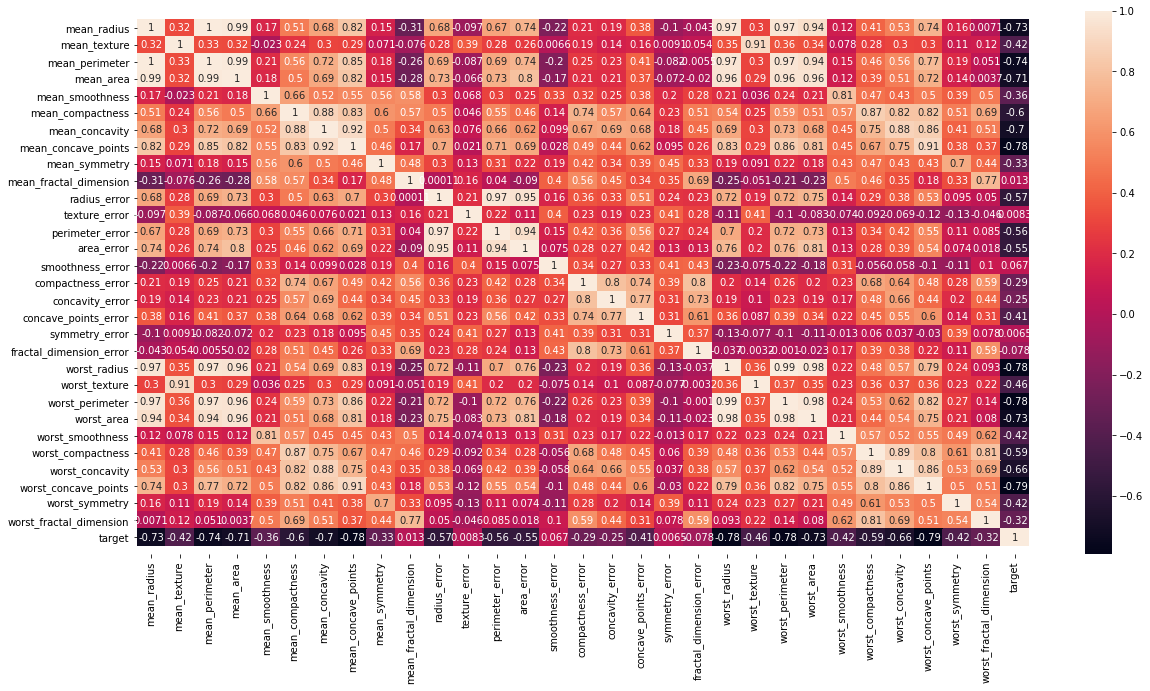

In [25]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df_cancer.corr(),annot=True) # This is because of an issue in matplotlib.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

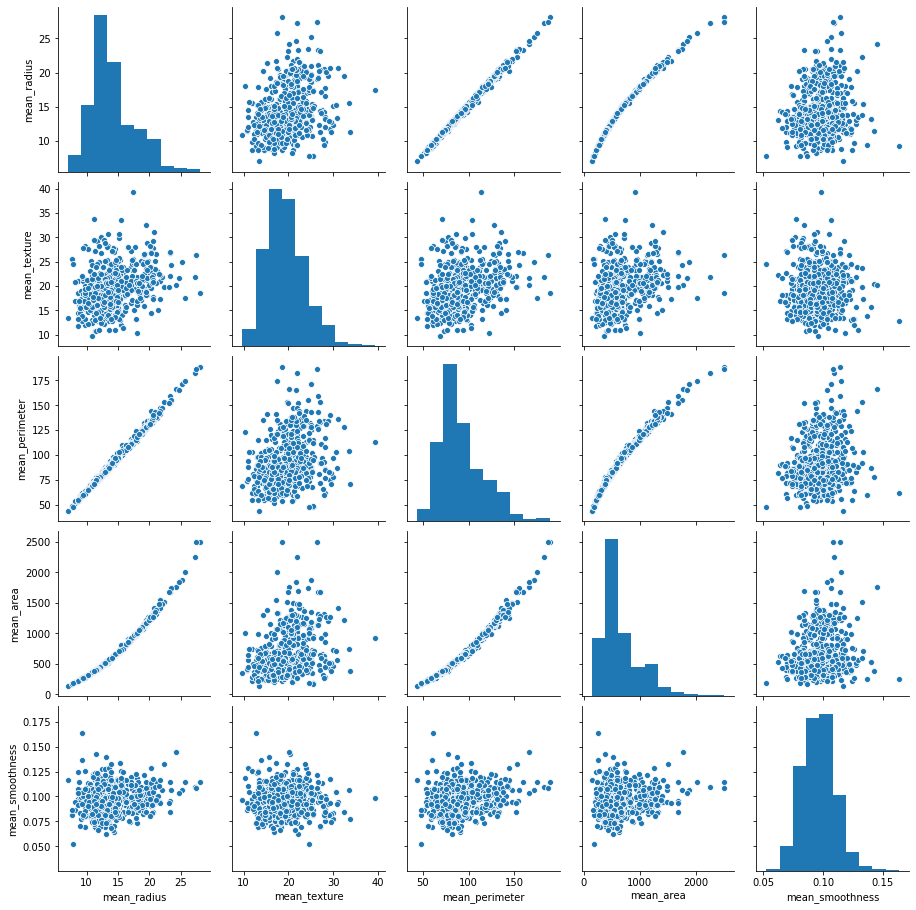

In [26]:
sns.pairplot(df_cancer, vars=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])

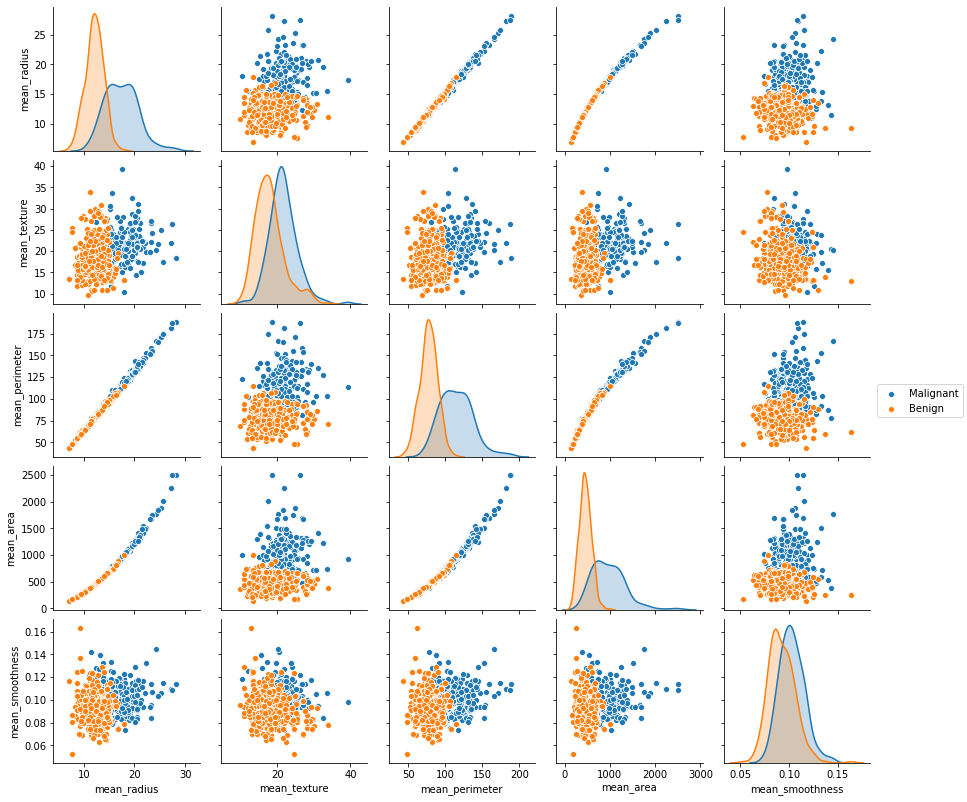

In [28]:
g = sns.pairplot(df_cancer,hue='target', vars=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
# Below is to allow the legend to use words instead of numbers.
handles = g._legend_data.values()
labels = ['Malignant','Benign']
g._legend.remove()
g.fig.legend(handles=handles,labels=labels, loc='center right',ncol=1)
g.fig.subplots_adjust(top=0.92,bottom=0.08,right=0.9)

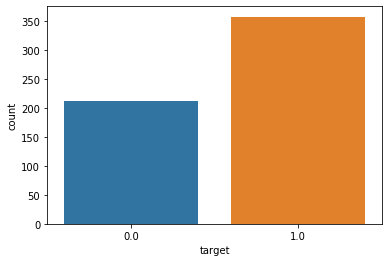

In [29]:
sns.countplot(df_cancer['target'])

In [0]:
features=['mean_radius','mean_texture','mean_perimeter','mean_compactness','mean_concavity','mean_symmetry','mean_fractal_dimension']
labels=['target']

In [0]:
randomized_data = df_cancer.reindex(np.random.permutation(df_cancer.index))

In [35]:
randomized_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
265,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.021430,0.009280,0.01367,0.002299,32.49,47.16,214.00,3432.0,0.14010,0.2644,0.34420,0.16590,0.2868,0.08218,0.0
112,14.26,19.65,97.83,629.9,0.07837,0.22330,0.300300,0.077980,0.1704,0.07769,0.3628,1.4900,3.399,29.25,0.005298,0.07446,0.143500,0.022920,0.02566,0.012980,15.30,23.73,107.00,709.0,0.08949,0.4193,0.67830,0.15050,0.2398,0.10820,1.0
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.017590,0.009206,0.01220,0.003130,16.57,20.86,110.30,812.4,0.14110,0.3542,0.27790,0.13830,0.2589,0.10300,0.0
185,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,0.4245,1.2680,2.680,26.43,0.014390,0.01200,0.001597,0.002404,0.02538,0.003470,11.87,21.18,75.39,437.0,0.15210,0.1019,0.00692,0.01042,0.2933,0.07697,1.0
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.104300,0.056130,0.2160,0.05891,0.4332,1.2650,2.844,43.68,0.004877,0.01952,0.022190,0.009231,0.01535,0.002373,19.47,31.68,129.70,1175.0,0.13950,0.3055,0.29920,0.13120,0.3480,0.07619,0.0


In [36]:
total_records = len(randomized_data)
training_set_size_portion = 0.8
training_set_size = int(total_records*training_set_size_portion)
test_set_size = total_records - training_set_size
print(total_records,training_set_size,test_set_size)

569 455 114


In [0]:
# Building the testing features and labels
testing_features = randomized_data.tail(test_set_size)[features].copy()
testing_labels = randomized_data.tail(test_set_size)[labels].copy()

In [39]:
print(testing_features.head())

     mean_radius  mean_texture  ...  mean_symmetry  mean_fractal_dimension
198       19.180         22.49  ...         0.1767                 0.05529
199       14.450         20.22  ...         0.1950                 0.06466
305       11.600         24.49  ...         0.1935                 0.05878
557        9.423         27.88  ...         0.1742                 0.06059
67        11.310         19.04  ...         0.1516                 0.05667

[5 rows x 7 columns]


In [40]:
testing_labels.head()

,target
198,0.0
199,0.0
305,1.0
557,1.0
67,1.0


In [41]:
training_features = randomized_data.head(training_set_size)[features].copy()
training_labels = randomized_data.head(training_set_size)[labels].copy()
print(training_features.head())
print(training_labels.head())

     mean_radius  mean_texture  ...  mean_symmetry  mean_fractal_dimension
265        20.73         31.12  ...         0.1769                 0.05674
112        14.26         19.65  ...         0.1704                 0.07769
73         13.80         15.79  ...         0.1662                 0.06566
185        10.08         15.11  ...         0.1703                 0.06048
132        16.16         21.54  ...         0.2160                 0.05891

[5 rows x 7 columns]
     target
265     0.0
112     1.0
73      0.0
185     1.0
132     0.0


In [0]:
feature_columns = [tf.feature_column.numeric_column(key) for key in features]

In [43]:
print(feature_columns)

[NumericColumn(key='mean_radius', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_texture', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_perimeter', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_compactness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_concavity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_symmetry', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_fractal_dimension', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [45]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10], n_classes=2,model_dir='tmp/model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc949ad2cc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(x=training_features,y=training_labels['target'], num_epochs=15,shuffle=True)

In [52]:
print(type(training_features['mean_radius']), type(training_labels['target']))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [53]:
classifier.train(input_fn=train_input_fn,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Savi

In [0]:
test_input_fn = tf.estimator.inputs.pandas_input_fn(x=testing_features,y=testing_labels['target'],num_epochs=15,shuffle=False)

In [59]:
classifier.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-04T14:35:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model/model.ckpt-54
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-04-14:35:10
INFO:tensorflow:Saving dict for global step 54: accuracy = 0.7894737, accuracy_baseline = 0.64912283, auc = 0.9064189, auc_precision_recall = 0.94675, average_loss = 0.59036136, global_step = 54, label/mean = 0.64912283, loss = 72.10842, precision = 0.75510204, prediction/mean = 0.5716796, recall = 1.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 54: tmp/model/model.ckpt-54


{'accuracy': 0.7894737,
 'accuracy_baseline': 0.64912283,
 'auc': 0.9064189,
 'auc_precision_recall': 0.94675,
 'average_loss': 0.59036136,
 'global_step': 54,
 'label/mean': 0.64912283,
 'loss': 72.10842,
 'precision': 0.75510204,
 'prediction/mean': 0.5716796,
 'recall': 1.0}

In [60]:
accuracy_score=classifier.evaluate(input_fn=test_input_fn)['accuracy']
print("Accuracy = {}".format(accuracy_score))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-04T14:35:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model/model.ckpt-54
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-03-04-14:35:41
INFO:tensorflow:Saving dict for global step 54: accuracy = 0.7894737, accuracy_baseline = 0.64912283, auc = 0.9064189, auc_precision_recall = 0.94675, average_loss = 0.59036136, global_step = 54, label/mean = 0.64912283, loss = 72.10842, precision = 0.75510204, prediction/mean = 0.5716796, recall = 1.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 54: tmp/model/model.ckpt-54
Accuracy = 0.7894737124443054
